In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [29]:
sns.set()

In [66]:
df=pd.read_csv('Wholesale+Customers+Data.csv')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [193]:
df.isnull().values.any()

False

In [216]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [108]:
df.drop(['Buyer/Spender'], axis=1,inplace=True)

# Problem 1

**A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).**

*1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?*

In [203]:
df.describe(include='all')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


The mean is larger than the median, so it might be the Right skewed, hence the items spending at the OTHER Region is more when compared to Lisbon & Oporto

Max value is more than the Q3, so it is clearly infers that all the items have outliers

In [82]:
df['Total']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [229]:
print(df.groupby(['Channel'])['Total'].sum())
print('')
print(df.groupby(['Region'])['Total'].sum())
print('')
print(df.groupby(['Channel'])['Region'].value_counts(ascending=True))

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64

Channel  Region
Hotel    Oporto     28
         Lisbon     59
         Other     211
Retail   Lisbon     18
         Oporto     19
         Other     105
Name: Region, dtype: int64


$Infer Based on Channel wise$

Hotel channel annual spend is nearly 8 Million USD, which is the higest spending.\
Retail channel annual spend is nearly 6.5 Million USD, which is the least spending.

$Infer Based on Region wise$
    
compared to Oporto and Lisbon; OTHER region annual spend is higest spending, which is 10.5 Million USD.\
whereas, the least spend region is OPORTO which is 1.5 Million USD.


1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [192]:
df.skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

Data are skewed right, magnitude of data is not symmetrical

<AxesSubplot:xlabel='Delicatessen', ylabel='Density'>

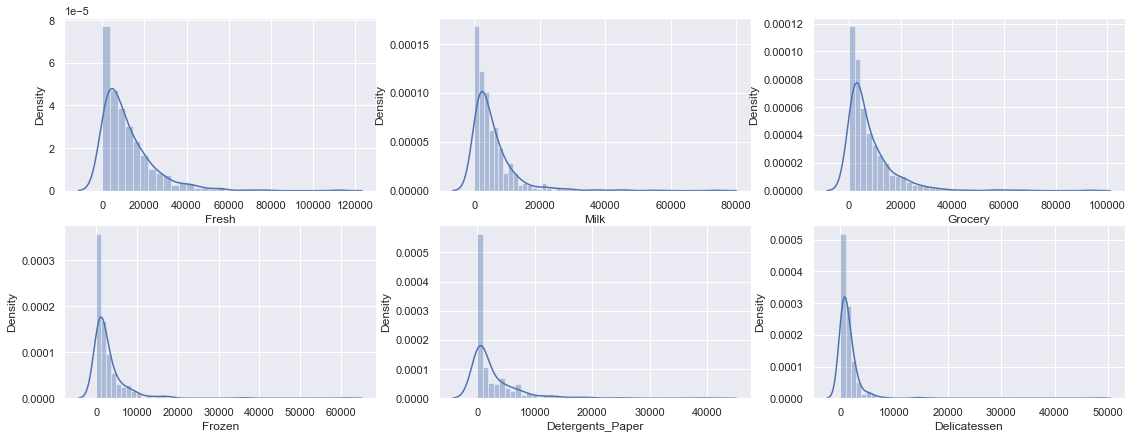

In [191]:
#plots to see the distribution of all the variables
plt.figure(figsize=(19,7))
plt.subplot(2,3,1)
sns.distplot(df['Fresh'])
plt.subplot(2,3,2)
sns.distplot(df['Milk'])
plt.subplot(2,3,3)
sns.distplot(df['Grocery'])
plt.subplot(2,3,4)
sns.distplot(df['Frozen'])
plt.subplot(2,3,5)
sns.distplot(df['Detergents_Paper'])
plt.subplot(2,3,6)
sns.distplot(df['Delicatessen'])

In [241]:
print(pd.pivot_table(df,index='Channel',values='Fresh',columns='Region',aggfunc='sum'))
print('')
print('Total Spending for Fresh item is :', (761233 + 326215+  2928269)+(93600 + 138506  +1032308))
print('')
print(pd.pivot_table(df,index='Channel',values='Milk',columns='Region',aggfunc='sum'))
print('')
print('Total Spending for Milk item is :', (228342 + 64519+  735753)+(194112 + 174625  +1153006))
print('')
print(pd.pivot_table(df,index='Channel',values='Grocery',columns='Region',aggfunc='sum'))
print('')
print('Total Spending for Grocery item is :', (237542  +123074 +  820101)+(332495 + 310200 + 1675150))
print('')
print(pd.pivot_table(df,index='Channel',values='Frozen',columns='Region',aggfunc='sum'))
print('')
print('Total Spending for Frozen item is :', (184512 + 160861 + 771606)+(46514 +  29271 + 158886))
print('')
print(pd.pivot_table(df,index='Channel',values='Detergents_Paper',columns='Region',aggfunc='sum'))
print('')
print('Total Spending for Detergents_Paper item is :', (56081 +  13516 + 165990)+(148055 + 159795 + 724420))
print('')
print(pd.pivot_table(df,index='Channel',values='Delicatessen',columns='Region',aggfunc='sum'))
print('')
print('Total Spending for Delicatessen item is :', (70632  + 30965 + 320358)+(33695 +  23541 + 191752))

Region   Lisbon  Oporto    Other
Channel                         
Hotel    761233  326215  2928269
Retail    93600  138506  1032308

Total Spending for Fresh item is : 5280131

Region   Lisbon  Oporto    Other
Channel                         
Hotel    228342   64519   735753
Retail   194112  174625  1153006

Total Spending for Milk item is : 2550357

Region   Lisbon  Oporto    Other
Channel                         
Hotel    237542  123074   820101
Retail   332495  310200  1675150

Total Spending for Grocery item is : 3498562

Region   Lisbon  Oporto   Other
Channel                        
Hotel    184512  160861  771606
Retail    46514   29271  158886

Total Spending for Frozen item is : 1351650

Region   Lisbon  Oporto   Other
Channel                        
Hotel     56081   13516  165990
Retail   148055  159795  724420

Total Spending for Detergents_Paper item is : 1267857

Region   Lisbon  Oporto   Other
Channel                        
Hotel     70632   30965  320358
Retail    3369

The wholesale distributor spends most for the Fresh Items then followed by Grocery and Milk in top three.\
Whereas the least spending of the wholesale distributor is for Delicatessen. \
Also the wholesale distributor almost equally spend for Frozen  and Detergents-Paper.\
On the whole we can clearly say the wholesale distributer spends mostly in Hotels as compared to Retail.


1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [ ]:
since the magnitude of data is not equal, so CV is the best to describe the behaviour of the products

In [183]:
cv=lambda x:np.std(x)/np.mean(x)
print('Variation for Fresh is: ',cv(df['Fresh']))
print('Variation for Milk is: ',cv(df['Milk']))
print('Variation for Milk is: ',cv(df['Grocery']))
print('Variation for Milk is: ',cv(df['Frozen']))
print('Variation for Milk is: ',cv(df['Detergents_Paper']))
print('Variation for Milk is: ',cv(df['Delicatessen']))

Variation for Fresh is:  1.0527196084948245
Variation for Milk is:  1.2718508307424503
Variation for Milk is:  1.193815447749267
Variation for Milk is:  1.5785355298607762
Variation for Milk is:  1.6527657881041729
Variation for Milk is:  1.8473041039189306


Lower CV is lower risk.

Using Coefficient of Variation we find out the least value is of Category “Fresh” (1.05) and highest value is of Category “Delicatessen” (1.84)

So from the given data it is clear that most inconsistent behavior shown by item – Delicatessen

And least inconsistent behavior shown by item – Fresh (More Profit)



1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:xlabel='Delicatessen', ylabel='Channel'>

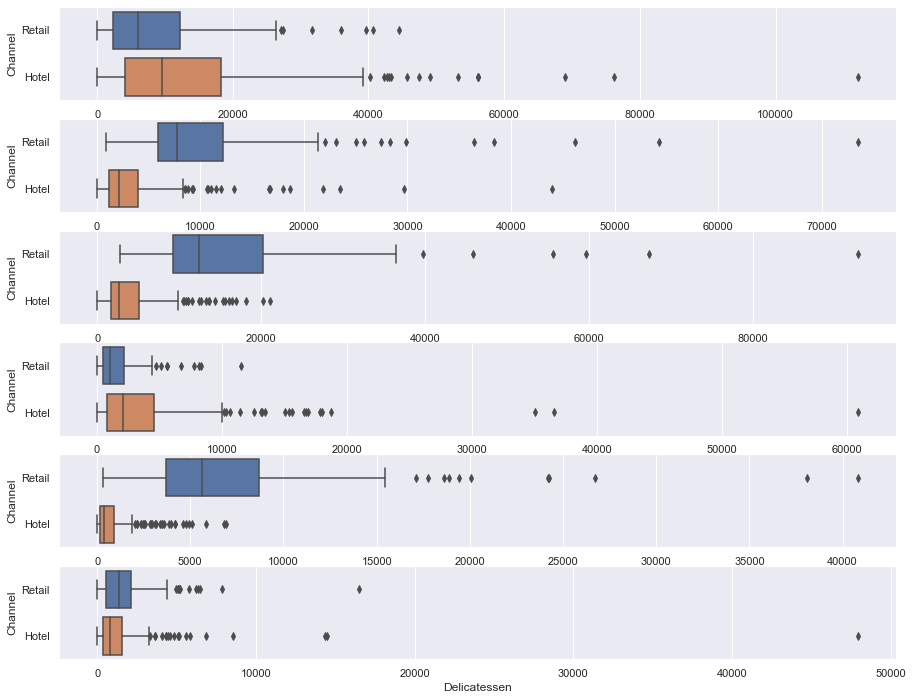

In [185]:
plt.figure(figsize=(15,12))
plt.subplot(6,1,1)
sns.boxplot(x=df['Fresh'],y=df['Channel'])
# plt.title('Fresh')
plt.subplot(6,1,2)
sns.boxplot(x=df['Milk'],y=df['Channel'])
# plt.title('Milk')
plt.subplot(6,1,3)
sns.boxplot(x=df['Grocery'],y=df['Channel'])
# plt.title('Grocery')
plt.subplot(6,1,4)
sns.boxplot(x=df['Frozen'],y=df['Channel'])
# plt.title('Frozen')
plt.subplot(6,1,5)
sns.boxplot(x=df['Detergents_Paper'],y=df['Channel'])
# plt.title('Detergents_Paper')
plt.subplot(6,1,6)
sns.boxplot(x=df['Delicatessen'],y=df['Channel'])

**Inference**

Form the above box plot it is clear that , Outliers are present in all the food items.

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

**Inference**

As per the analysis, I find out that there are inconsistencies in spending of different items (by calculating Coefficient of Variation), which should be minimized. The spending of Hotel and Retail channel are different which should be more or less equal. And also spent should equal for different regions. Need to focus on other items also than “Fresh” and “Grocery”

# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [3]:
df2=pd.read_csv('Survey-1.csv')
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [246]:
df2.isnull().values.any()

False

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)\
2.1.1. Gender and Major

In [352]:
pd.crosstab(index=df2['Gender'], columns=df2['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [353]:
print(pd.crosstab(index=df2['Gender'], columns=df2['Grad Intention'],margins=True))

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62


2.1.3. Gender and Employment

In [354]:
print(pd.crosstab(index=df2['Gender'], columns=df2['Employment'],margins=True))

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62


2.1.4. Gender and Computer

In [356]:
print(pd.crosstab(index=df2['Gender'], columns=df2['Computer'],margins=True))

Computer  Desktop  Laptop  Tablet  All
Gender                                
Female          2      29       2   33
Male            3      26       0   29
All             5      55       2   62


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [61]:
# xbar,mu=62
df2.groupby(['Gender']).size()

Gender
Female    33
Male      29
dtype: int64

In [288]:
probability_of_male=round((29/62)* 100,4)
probability_of_male

46.7742

2.2.2. What is the probability that a randomly selected CMSU student will be female

In [291]:
probability_of_female=round((33/62)* 100,4)
probability_of_female

53.2258

2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.



In [358]:
pd.crosstab(index=df2['Gender'],columns=df2['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [124]:
total_male=29
print('Probability of students choose Accounting streem among Males is', 4/29 * 100)
print('Probability of students choose CIS streem among Males is', 1/29* 100)
print('Probability of students choose Economics/Finance streem among Males is', 4/29* 100)
print('Probability of students choose International Business streem among Males is', 2/29* 100)
print('Probability of students choose Management streem among Males is', 6/29* 100)
print('Probability of students choose Other streem among Males is', 4/29* 100)
print('Probability of students choose Retailing/Marketing streem among Males is', 5/29* 100)
print('Probability of students choose Undecided streem among Males is', 3/29* 100)

Probability of students choose Accounting streem among Males is 13.793103448275861
Probability of students choose CIS streem among Males is 3.4482758620689653
Probability of students choose Economics/Finance streem among Males is 13.793103448275861
Probability of students choose International Business streem among Males is 6.896551724137931
Probability of students choose Management streem among Males is 20.689655172413794
Probability of students choose Other streem among Males is 13.793103448275861
Probability of students choose Retailing/Marketing streem among Males is 17.24137931034483
Probability of students choose Undecided streem among Males is 10.344827586206897


**Inference**

And from this output we can easily say that most of the males students prefer Management as Majors and CIS is the least preferred one

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [125]:
total_female=33
print('Probability of students choose Accounting streem among Males is', 3/33* 100)
print('Probability of students choose CIS streem among Males is', 3/33* 100)
print('Probability of students choose Economics/Finance streem among Males is', 7/33* 100)
print('Probability of students choose International Business streem among Males is', 4/33* 100)
print('Probability of students choose Management streem among Males is', 4/33* 100)
print('Probability of students choose Other streem among Males is', 3/33* 100)
print('Probability of students choose Retailing/Marketing streem among Males is', 9/33* 100)
print('Probability of students choose Undecided streem among Males is', 0/33* 100)

Probability of students choose Accounting streem among Males is 9.090909090909092
Probability of students choose CIS streem among Males is 9.090909090909092
Probability of students choose Economics/Finance streem among Males is 21.21212121212121
Probability of students choose International Business streem among Males is 12.121212121212121
Probability of students choose Management streem among Males is 12.121212121212121
Probability of students choose Other streem among Males is 9.090909090909092
Probability of students choose Retailing/Marketing streem among Males is 27.27272727272727
Probability of students choose Undecided streem among Males is 0.0


**Inference**

And from this output we can easily say that most of the females students prefer Retailing/Marketing as Majors.

2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

 

In [307]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [359]:
pd.crosstab(index=df2['Gender'],columns=df2['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [361]:
# probability That a randomly chosen student is a male
a=29/62
# probability That a randomly chosen student is a male and intends to graduate
b=17/29
a * b 

0.27419354838709675

**Inference**

Probability That a randomly chosen student is a male and intend graduate is: 0.27419 or 27.419%

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [364]:
pd.crosstab(index=df2['Gender'],columns=df2['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [368]:
# probability that a randomly selected student is a female
a=33/62
# probability that a randomly selected student is a female and does NOT have a laptop
b=4/33
a * b

0.06451612903225806

**Inference**

Probability that a randomly selected student is a female and does NOT have a laptop is:  0.06451  or   6.45%

2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?


In [369]:
pd.crosstab(index=df2['Gender'],columns=df2['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [371]:
# not mutually exclusive
# p(a u b)=p(a)+p(b)-p(a n b)
# probability that a randomly chosen student is a male
a=29/62
# probability that a randomly chosen student has full-time employment
b=10/62
# probability that a randomly chosen male has full-time employment
a_n_b=7/29

a+b-a_n_b

0.3876529477196885

**Inference**

Probability that a randomly chosen student is a male or has full-time employment is :
 0.38765   or.  38.76%


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [126]:
pd.crosstab(index=df2['Gender'], columns=df2['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [376]:
# probability that given a female student 
a= 33/62
# female student is majoring in international business
b= 4/33
# female student is majoring in management
c=4/33
(4/33)+(4/33)

0.24242424242424243

**Inference**

Probability that given a female student is randomly chosen, she is majoring in international business or management is : 0.242424    or    24.24%

2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [54]:
df2_1=df2[['Gender','Grad Intention']]
df2_1.drop(df2_1.index[df2_1['Grad Intention'] == 'Undecided'], inplace = True)
df2_1.head()

,Gender,Grad Intention
0,Female,Yes
1,Male,Yes
2,Male,Yes
3,Male,Yes
8,Female,Yes


In [58]:
pd.crosstab(index=df2_1['Gender'],columns=df2_1['Grad Intention'],margins=True,colnames=['Grad Intention'])

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [62]:
# a_n_b = a * b for independent event

# Probability of being female
a=20/40
# Probability of graduate intention 
b=28/40
# graduate intention and being female
# a n b = 11/20 = 0.55

a_n_b =(20/40) * (28/40) 
a_n_b 


0.35

**Inference**

a_n_b != 0.55\
Here, p(A n B)  is not equal to p(A) * p(B), which is clearly saying that the graduate intention and being female are NOT independent events

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?



In [415]:
# From the given data we know the sample. so it is dicreet distribution. Also Mean and stdev can be known 
# using GPA. so Poisson Distributiob will be the best solution
np.std(df2['GPA'])

0.37433256594525566

In [414]:
np.mean(df2['GPA'])

3.129032258064516

In [423]:
# p(x) < 3,so cumulative of 2 will give the answer
stats.poisson.cdf(2,3.129)

0.3949181347042842

**Inference**

Applying the derived inputs in Poisson distribution in Python the output is  0.39491 or 39.49%

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [468]:
pd.pivot_table(data=df2,index='Gender',values='Salary',aggfunc='mean')

,Salary
Gender,
Female,48.787879
Male,48.275862


In [469]:
pd.pivot_table(data=df2,index='Gender',values='Salary',aggfunc='std')

,Salary
Gender,
Female,13.272405
Male,10.793174


In [470]:
# probability that a randomly selected male earns 50 or more
# p(x1)>=50
1-stats.norm.cdf(50,48.275862,10.793174)

0.43654161717347906

**Inference**


Probability that a randomly selected male earns 50 or more is 0.43654 or 43.65%

In [471]:
# Find the conditional probability that a randomly selected female earns 50 or more
# p(x2)>=50
1-stats.norm.cdf(50,48.787879,13.272405)

0.46361661977806423

**Inference**


Probability that a randomly selected Female earns 50 or more is 0.46361 or 46.61%

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

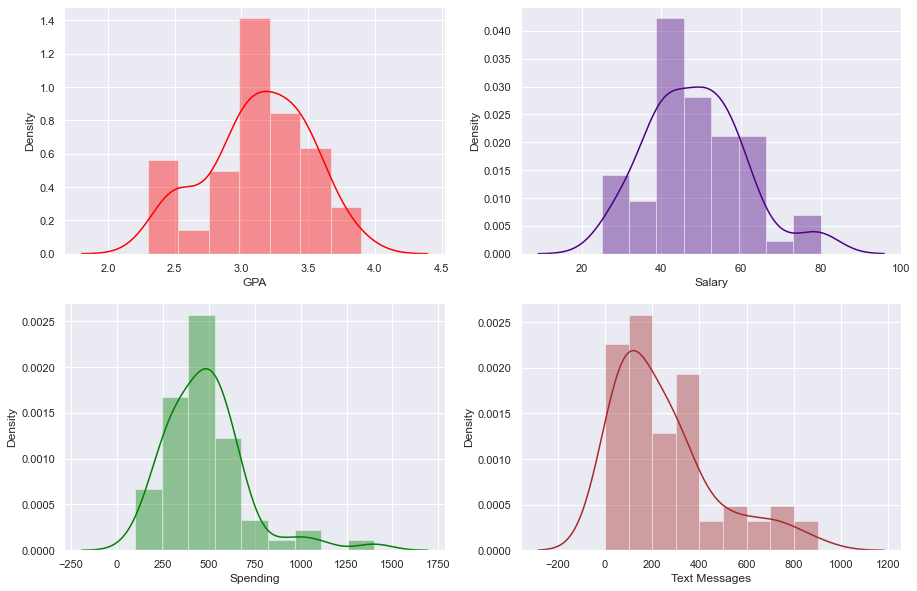

In [497]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df2['GPA'],color='red')
plt.subplot(2,2,2)
sns.distplot(df2['Salary'],color='indigo')
plt.subplot(2,2,3)
sns.distplot(df2['Spending'],color='green')
plt.subplot(2,2,4)
sns.distplot(df2['Text Messages'],color='brown')

In [498]:
df2[['GPA','Salary','Spending','Text Messages']].skew()

GPA             -0.314600
Salary           0.534701
Spending         1.585915
Text Messages    1.295808
dtype: float64

**Inference**


GPA (Left Skewed):= Students Average GPA is close to normal distribution, 
    but few students getting less GPA. Majority of studenst getting good GPA 

Salary (Right Skewed):= Students Average Salary is very very close to normal distribution, 
     Most of the studens getting good Salsry,  very very few students getting less salary.
        
Spending (Right Skewed):=From the given data set, Students spending more money and very few students spending less\
Text Messages (Right Skewed):=similarly, Students sending more Text messages, only very few are sending less messages




# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [610]:
df3=pd.read_csv('A+&+B+shingles.csv')
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.\
based on the data the company like to show (i.e. status quo)\
so Ho<=0.35\
Customers feels that they have purchased a product lacking in quality, which means the moisture is more than 0.35\
H(a)>0.35

since population stdev is not given T- Test is best option\
also it is a 1-tail test(u < 0.35)\
since significance level(alpha) is not there we can take  0.05 by default\

**T- Test for A Shingles**

In [536]:
t, p_value=stats.ttest_1samp(df3['A'],0.35)
print (t, p_value)
p_value/2 # since it is 1- tail test p_value should be divided by 2


-1.4735046253382782 0.14955266289815025


0.07477633144907513

since p_value is > than significance level, failed to reject Ho ,\
FOr Shingles 'A', the company have enough evidence to show that the mean moisture content \
is less than 0.35 pounds per 100 square feet.

**T- Test for B Shingles**

In [600]:
t, p_value=stats.ttest_1samp(df3['B'],0.35,nan_policy='omit')
print (t, p_value)
p_value/2

-4.311710524179449 0.00012557068120902648


6.278534060451324e-05

since p_value is < than significance level, reject Ho ,\
For shingles 'B', there is evough evidence to show Customers feeling towards the product quality is lacking\
(i.e. the moisture content is more than 0.35)



3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Do you think that the population mean for shingles A and B are equal,\
so Ho(mu) population mean for shingles A = population mean for shingles B\

Eventually, H1(mu) population mean for shingles A != population mean for shingles B

In [588]:
print('sample mean of A : ',np.mean(df3['A']))
print('sample stdev of A : ',np.std(df3['A']))
print('sample mean of B : ',np.mean(df3['B']))
print('sample stdev of B : ',np.std(df3['B']))

sample mean of A :  0.3166666666666666
sample stdev of A :  0.13383239933256486
sample mean of B :  0.23555555555555557
sample stdev of B :  0.15702873842503487


x1=0.31666
s1=0.13383
n1=36
x2=0.23555
s2=0.15702
n2=31
                       Sample        Sample
            Size        Mean        Variance
Sample A    36          0.31666      0.13383
Sample B    31          0.23555      0.15702

In [607]:
# stats.ttest_ind(mean1=0.31666, std1=np.sqrt(0.13383), nobs1=36,
#                       mean2=0.23555, std2=np.sqrt(0.15702), nobs2=31)

In [612]:
p_value=stats.ttest_ind(df3['A'],df3['B'],equal_var=False,nan_policy='omit')
p_value

Ttest_indResult(statistic=2.3257710269401746, pvalue=0.023007859248632315)

since p_value is < than significance level, reject Ho ,

Hence the population mean for shingles A is not equal to population mean for shingles B


My assumption is Shingles 'A' having more number of measuremnent compared to SHingles B.\
If Shingles 'B' also perform same numner of measurement, may be there is more chances for\ 
equality of means. which the COmpany can have more strong evidence to show that Both the shingles\
contains the moisture level withing permissable limit (i.e. less than 0.35 pounds per 100 square feet)
